### ex8 Anomaly detection

We will implement the anomaly detection algorithm and apply it to detect failing servers on a network. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy.optimize import minimize
from scipy.io import loadmat

#### Part 1: Load Example Dataset  

We start this exercise by using a small dataset that is easy to visualize.
Our example case consists of 2 network server statistics across several machines: the latency and throughput of each machine. This exercise will help us find possibly faulty (or very fast) machines.

In [52]:
#  The following command loads the dataset. You should now have the
#  variables X, Xval, yval in your environment

data1=loadmat('ex8data1.mat');
X=data1['X']
Xval=data1['Xval']
yval=data1['yval']
print(X.shape)

(307, 2)


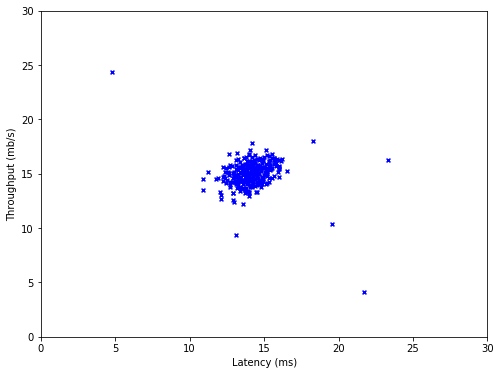

In [11]:
#  Visualize the example dataset
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], color='b', marker='x',s=15);
plt.axis([0, 30, 0, 30]);
plt.xlabel('Latency (ms)');
plt.ylabel('Throughput (mb/s)');

#### Part 2: Estimate the dataset statistics

For this exercise, we assume a Gaussian distribution for the dataset.

We first estimate the parameters of our assumed Gaussian distribution, then compute the probabilities for each of the points and then visualize both the overall distribution and where each of the points falls in terms of that distribution.

In [12]:
def estimateGaussian(X):   
#ESTIMATEGAUSSIAN This function estimates the parameters of a 
#Gaussian distribution using the data in X
#   [mu sigma2] = estimateGaussian(X), 
#   The input X is the dataset with each n-dimensional data point in one row
#   The output is an n-dimensional vector mu, the mean of the data set
#   and the variances sigma^2, an n x 1 vector
# 

# Useful variables
    [m, n] = X.shape

# You should return these values correctly
    mu = np.zeros((n, 1));
    sigma2 = np.zeros((n, 1));
    mu=X.mean(axis=0)
    sigma2=X.var(axis=0)
    
    return mu,sigma2

# ====================== YOUR CODE HERE ======================
# Instructions: Compute the mean of the data and the variances
#               In particular, mu(i) should contain the mean of
#               the data for the i-th feature and sigma2(i)
#               should contain variance of the i-th feature.

In [18]:
print('Visualizing Gaussian fit.\n');

#  Estimate mu and sigma2
mu,Sigma2 = estimateGaussian(X);

Visualizing Gaussian fit.



In [37]:
k = mu.shape[0];
Sigma2 = np.diag(Sigma2);
Sigma2
cons=(2 * math.pi)**(- k / 2) * np.linalg.det(Sigma2)**(-0.5)

In [41]:
cons=(2 * math.pi)**(- k / 2) * np.linalg.det(Sigma2)**(-0.5)
exp=np.exp(-0.5*(((X-mu).T.dot(X-mu))).dot(np.linalg.inv(Sigma2)))

In [49]:
def multivariateGaussian(X, mu, Sigma2):
#MULTIVARIATEGAUSSIAN Computes the probability density function of the
#multivariate gaussian distribution.
#    p = MULTIVARIATEGAUSSIAN(X, mu, Sigma2) Computes the probability 
#    density function of the examples X under the multivariate gaussian 
#    distribution with parameters mu and Sigma2. If Sigma2 is a matrix, it is
#    treated as the covariance matrix. If Sigma2 is a vector, it is treated
#    as the \sigma^2 values of the variances in each dimension (a diagonal
#    covariance matrix)
    k = mu.shape[0];
    Sigma2 = np.diag(Sigma2);
    cons=(2 * math.pi)**(- k / 2) * np.linalg.det(Sigma2)**(-0.5)
    exp=np.exp((-0.5*(((X-mu).dot(np.linalg.inv(Sigma2)))).dot((X-mu).T)).sum(axis=0))
    p = cons*exp
    
    return p

In [51]:
#  Returns the density of the multivariate normal at each data point (row) of X
p = multivariateGaussian(X, mu, sigma2);
p.shape

(307,)

In [57]:
X1, X2= np.meshgrid(np.arange(0,35.1,0.5), np.arange(0,35.1,0.5)); 
np.column_stack((X1,X2)).shape

(71, 142)

In [60]:
def visualizeFit(X, mu, sigma2):
#   VISUALIZEFIT Visualize the dataset and its estimated distribution.
#   VISUALIZEFIT(X, p, mu, sigma2) This visualization shows you the 
#   probability density function of the Gaussian distribution. Each example
#   has a location (x1, x2) that depends on its feature values.
    X1, X2= np.meshgrid(np.arange(0,35.1,0.5), np.arange(0,35.1,0.5)); 
    Z = multivariateGaussian(np.column_stack((X1.reshape(X1.size, order='F'),X2.reshape(X2.size, order='F'))),mu,sigma2);
    Z = Z.reshape(X1.shape, order='F');

    plt.scatter(X[:,0], X[:,1], color='b', marker='x');

# Do not plot if there are infinities

    plt.contour(X1, X2, Z, np.power(10, (np.arange(-20, 0.1, 3)).T));


In [81]:
X1,X2 = np.meshgrid(np.arange(0, 35.1, 0.5), np.arange(0, 35.1, 0.5))
np.column_stack((X1.reshape((X1.size,1), order='F'), X2.reshape((X2.size,1), order='F'))).shape

(5041, 2)

In [86]:
Z = multivariateGaussian(np.column_stack((X1.reshape((X1.size,1), order='F'), X2.reshape((X2.size,1), order='F'))), mu, sigma2)

C:\Users\jzhang11\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: overflow encountered in exp


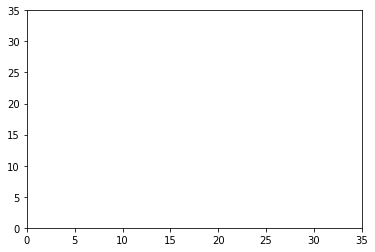

In [92]:
plt.contour(X1.reshape((X1.size,1), order='F'), X2.reshape((X2.size,1), order='F'), Z.reshape((-1,1)), np.power(10,(np.arange(-20, 0.1, 3)).T))

In [88]:
def visualizeFit(X, mu, sigma2):
    #VISUALIZEFIT Visualize the dataset and its estimated distribution.
    #   VISUALIZEFIT(X, p, mu, sigma2) This visualization shows you the 
    #   probability density function of the Gaussian distribution. Each example
    #   has a location (x1, x2) that depends on its feature values.
    #

    X1,X2 = np.meshgrid(np.arange(0, 35.1, 0.5), np.arange(0, 35.1, 0.5))
    Z = multivariateGaussian(np.column_stack((X1.reshape((X1.size,1), order='F'), X2.reshape((X2.size,1), order='F'))), mu, sigma2)

    plt.plot(X[:, 0], X[:, 1],'bx', markersize=13, markeredgewidth=1)
    # plt.scatter(X[:, 0], X[:, 1], s=150, c='b', marker='x', linewidths=1)

    plt.hold(True)
    # Do not plot if there are infinities
    if (np.sum(np.isinf(Z)) == 0):
        plt.contour(X1, X2, Z, np.power(10,(np.arange(-20, 0.1, 3)).T))

    plt.hold(False)

C:\Users\jzhang11\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: overflow encountered in exp
C:\Users\jzhang11\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\jzhang11\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\jzhang11\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
C:\Users\jzhang11\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: 

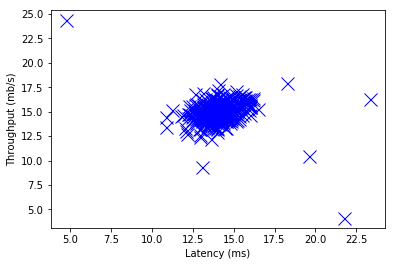

In [89]:
#  Visualize the fit
visualizeFit(X,  mu, sigma2);
plt.xlabel('Latency (ms)');
plt.ylabel('Throughput (mb/s)');

In [17]:
X[:,0].var()

1.8326314134945172

In [66]:
a=np.arange(0, 35.1, 0.5)
b=np.arange(0, 35.1, 0.5)
a

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,
        13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,
        18. ,  18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,
        22.5,  23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,
        27. ,  27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,
        31.5,  32. ,  32.5,  33. ,  33.5,  34. ,  34.5,  35. ])

In [68]:
X1,X2 = np.meshgrid(np.arange(0, 35.1, 0.5), np.arange(0, 35.1, 0.5))
X1.shape

(71, 71)

In [74]:
X1.reshape(X1.size, order='F')
X1.size

5041

In [70]:
a=[1,2,3,4]
b=[1,2,3,4]
x1,x2=np.meshgrid(a,b)


In [71]:
x1

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [72]:
x2

array([[1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3],
       [4, 4, 4, 4]])